In [1]:
import pandas as pd

red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0 for grade in wine['quality']]

x = wine.drop(['taste','quality'], axis= 1)
y = wine['taste']

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# accuracy_score(y_train, y_pred_tr)
# accuracy_score(y_test, y_pred_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7427361939580527
Test Acc:  0.7438461538461538


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



- macro avg 
(0.68 + 0.77) / 2
- weighted avg
 0.68 * (477/1300) + 0.77 * (823/1300)

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]], dtype=int64)

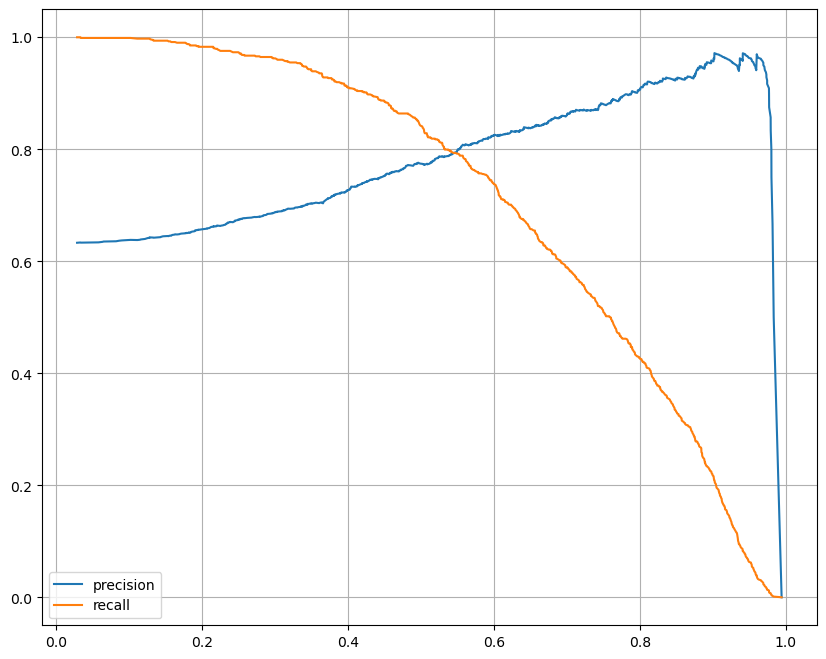

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:, 1]
precisionm, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisionm[:len(thresholds)], label = 'precision') 
plt.plot(thresholds, recalls[:len(thresholds)], label = 'recall')
plt.grid()
plt.legend()
plt.show() 

In [13]:
pred_proba = lr.predict_proba(X_test)
pred_proba

array([[0.40526731, 0.59473269],
       [0.50957556, 0.49042444],
       [0.10215001, 0.89784999],
       ...,
       [0.22540242, 0.77459758],
       [0.67366935, 0.32633065],
       [0.31452992, 0.68547008]])

In [16]:
y_pred_test

array([1., 0., 1., ..., 1., 0., 1.])

In [17]:
y_pred_test.reshape(-1,1)

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [14]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1,1)], axis=1)

array([[0.40526731, 0.59473269, 1.        ],
       [0.50957556, 0.49042444, 0.        ],
       [0.10215001, 0.89784999, 1.        ],
       ...,
       [0.22540242, 0.77459758, 1.        ],
       [0.67366935, 0.32633065, 0.        ],
       [0.31452992, 0.68547008, 1.        ]])

threshold 바꾸는 코드

In [18]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)

In [20]:
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [21]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [22]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300

